#### Load Dataset

In [22]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from utils import remove_outliers_iqr_label, QuantizeCat, DateProcess

sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [13]:
df = pd.read_csv('new_dataset.csv')
X = df.drop(columns=['id', 'sold_price'])
y = df['sold_price']

In [14]:
X.head(1)

,thoroughfare_id,cenu2016_ettlement_geogid,census2016_small_area_geogid,local_authority_id,post_county_name,eircode_area_code,postal_address,new_home_ind,sold_date,lat,lon,building_property_subtype_code,building_shape_area_value,sqm_value,yoc_value,storey_value,beds_value,baths_value,house_number,road,city_district,city,district,county,state_district,postcode,country,country_code,locality,village,municipality,suburb,town,residential,craft,amenity,building,commercial,neighbourhood,place,region,tourism,quarter,shop,leisure,historic,office
0,1200015895,35001.000,A268003007,29,dublin,D07,apartment 183 the spinnaker arran quay dublin ...,0,24/08/2015,53.346,-6.277,multi-family,nan,nan,1993.000,1.000,1.000,nan,11,Arran Quay,Arran Quay C ED,Dublin,Dublin 7,County Dublin,Leinster,D07 HK38,Ireland,ie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Data Exploration

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 47 columns):
thoroughfare_id                   2500 non-null int64
cenu2016_ettlement_geogid         2482 non-null float64
census2016_small_area_geogid      2500 non-null object
local_authority_id                2500 non-null int64
post_county_name                  2500 non-null object
eircode_area_code                 2500 non-null object
postal_address                    2500 non-null object
new_home_ind                      2500 non-null int64
sold_date                         2500 non-null object
lat                               2500 non-null float64
lon                               2500 non-null float64
building_property_subtype_code    2500 non-null object
building_shape_area_value         1054 non-null float64
sqm_value                         1613 non-null float64
yoc_value                         1972 non-null float64
storey_value                      2213 non-null float64
beds_valu

In [16]:
missing_found = dict(X.isna().sum())
missing_found = {key: int(missing_found[key]) for key in missing_found}
percentage_missing = dict(np.round(X.isna().sum() / len(X), 4)*100)
missing_df = pd.DataFrame.from_dict([percentage_missing]).T
missing_df.columns = ['%'] * len(missing_df.columns)
missing_df.sort_values(by="%", ascending=False).head(32)

,%
office,99.960
historic,99.960
craft,99.880
place,99.840
neighbourhood,99.320
tourism,99.280
leisure,99.000
commercial,98.920
shop,98.640
region,98.240


#### Insights from monovariate statistical description of numerical features

* Average building shape area value is 79.315.
* Number of beds has bigger impact on price than bathrooms

In [17]:
numeric_features = ['building_shape_area_value', 'sqm_value','yoc_value','storey_value','beds_value','baths_value','sold_price']
df[numeric_features].describe()

,building_shape_area_value,sqm_value,yoc_value,storey_value,beds_value,baths_value,sold_price
count,1054.000,1613.000,1972.000,2213.000,1319.000,513.000,2500.000
mean,79.315,92.658,1968.223,1.520,2.732,1.595,380195.294
std,31.698,48.614,43.016,0.615,1.239,1.011,301204.778
min,42.587,-1.000,1790.000,1.000,1.000,0.000,50000.000
25%,54.056,60.100,1934.000,1.000,2.000,1.000,210000.000
50%,73.090,77.400,1990.000,1.000,2.000,1.000,300000.000
75%,94.355,112.470,2000.000,2.000,4.000,2.000,450000.000
max,208.260,447.760,2019.000,4.000,11.000,8.000,3795000.000


#### Distribution of house sold prices

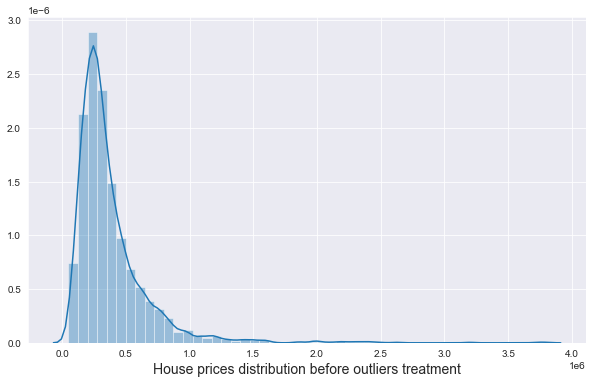

In [18]:
fig, ax = plt.subplots(1, 1,figsize=(10,6))

sns.distplot(df['sold_price'], ax=ax)
ax.set_xlabel('House prices distribution before outliers treatment', fontsize=14);

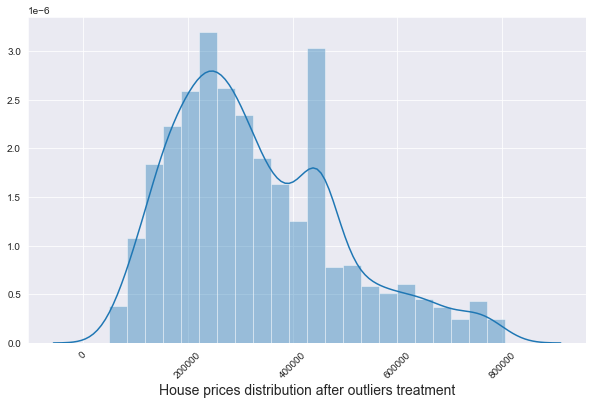

In [19]:
fig, ax = plt.subplots(1, 1,figsize=(10,6))

sns.distplot(remove_outliers_iqr_label(df['sold_price']), ax=ax)
ax.set_xlabel('House prices distribution after outliers treatment', fontsize=14)
plt.xticks(rotation=45, fontsize=10);

#### Correlation among numerical variables
* It is possible to see that sql_value has strong positive correlation with sold_price, followed by building_shape_area_value and beds_value;
* Meanwhile yoc_value presents

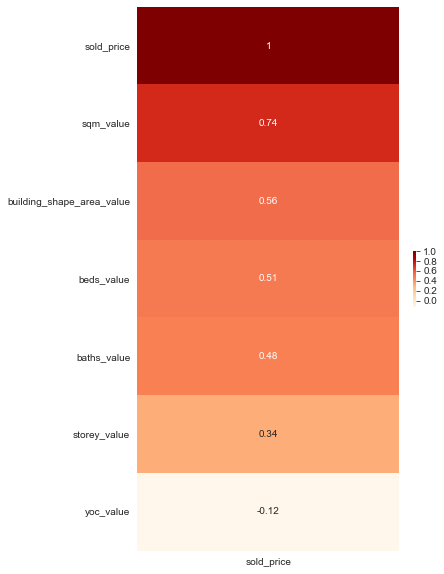

In [20]:
dfTemp_corr = df[numeric_features].corr()
plt.figure(figsize=(5,10))
g = sns.heatmap(
    dfTemp_corr[['sold_price']].sort_values(by=['sold_price'],ascending=False),
    cbar_kws={'fraction' : 0.01},
    cmap='OrRd',
    annot=True
)

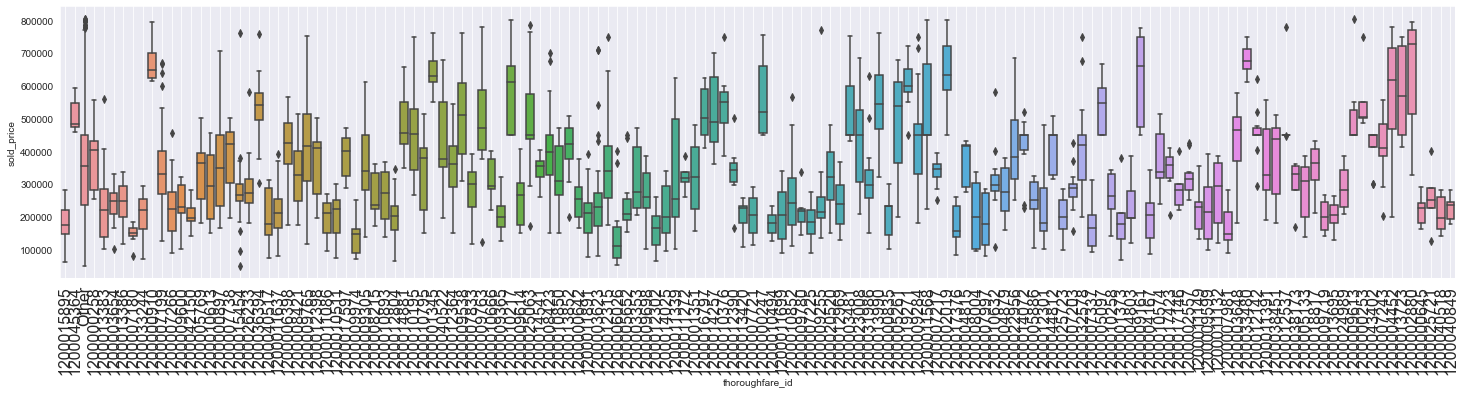

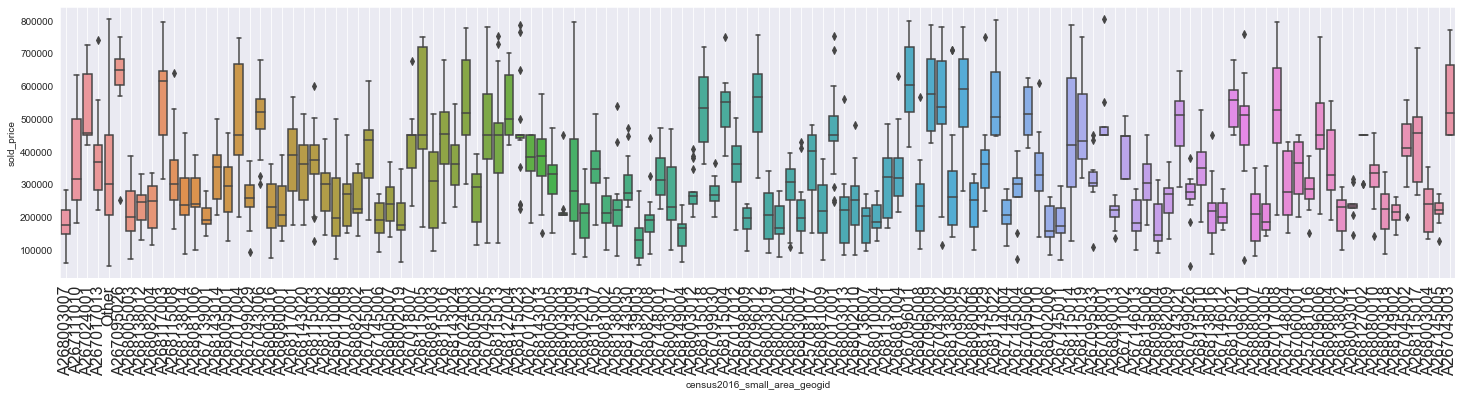

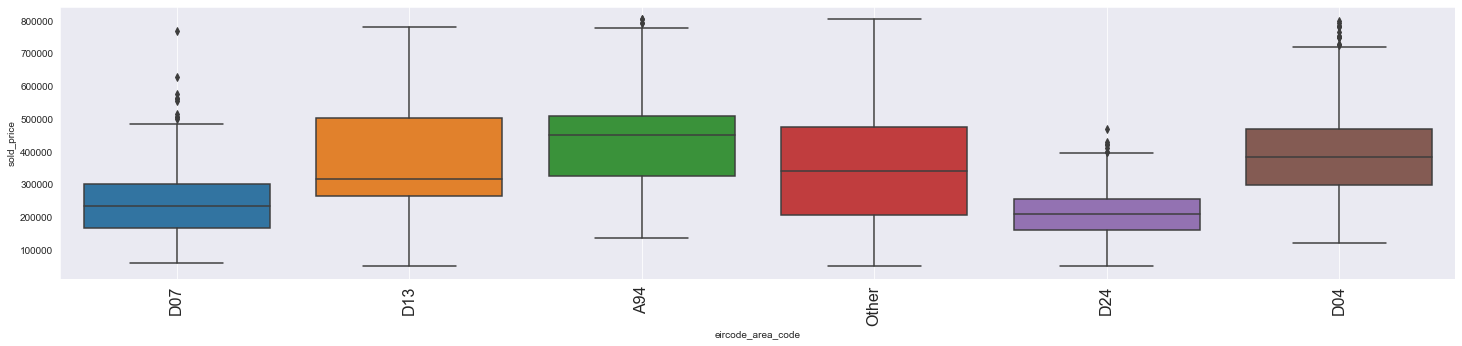

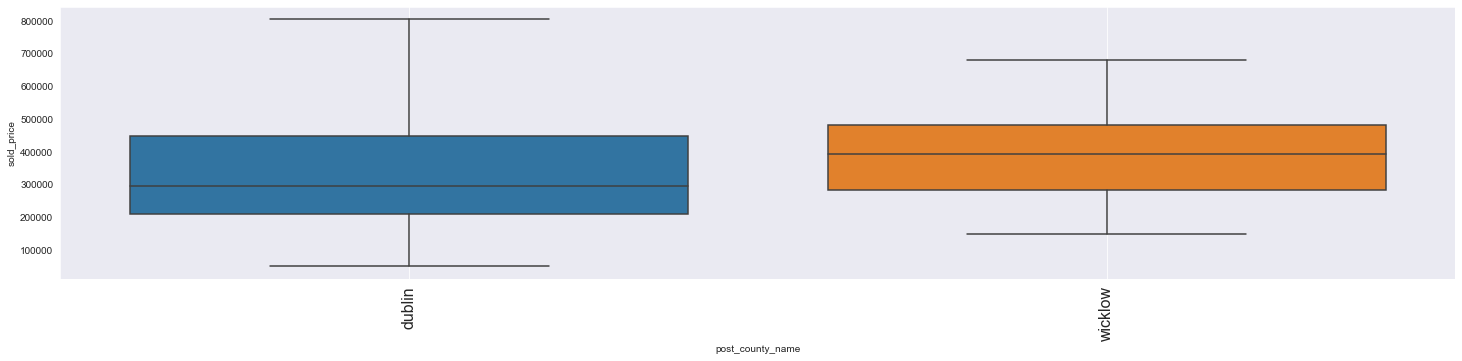

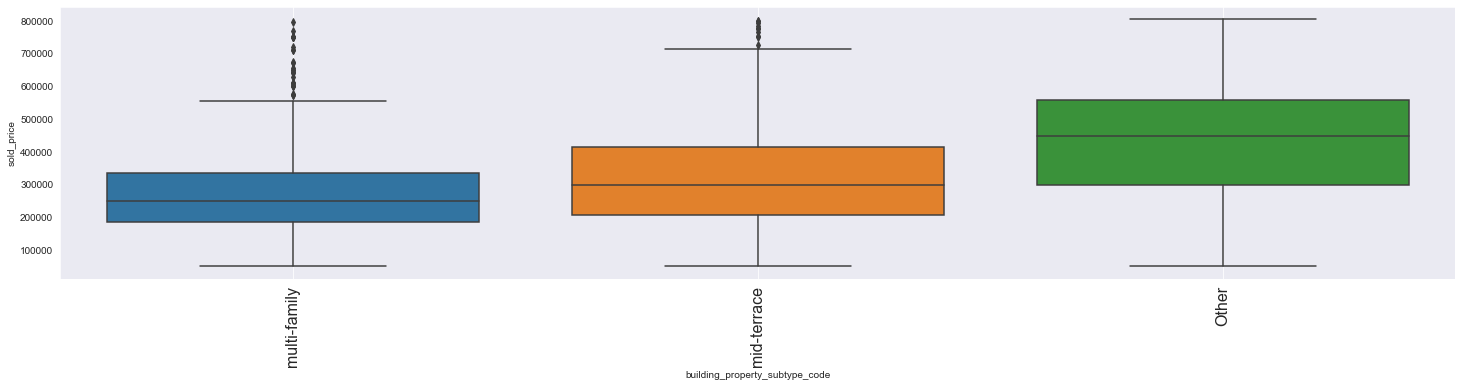

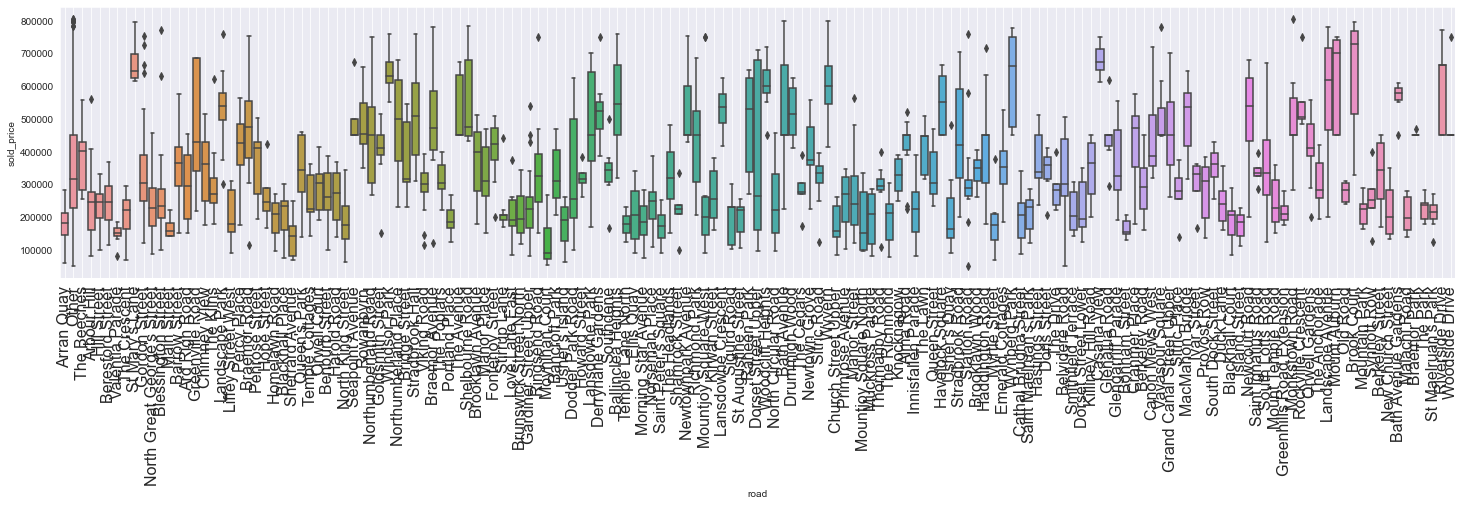

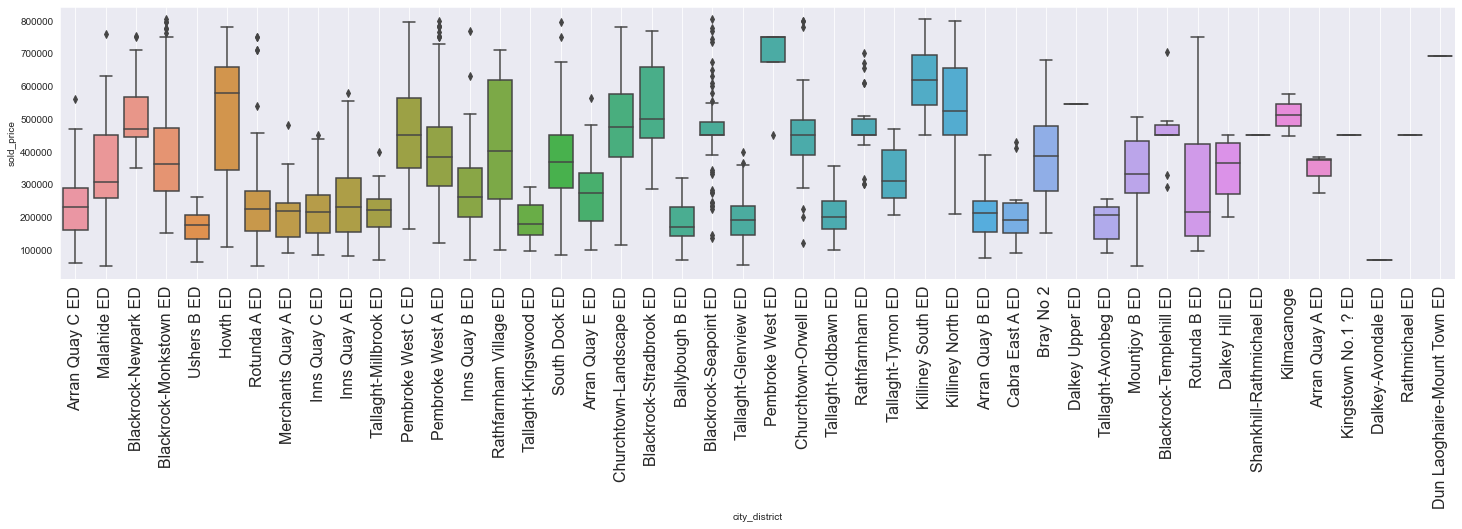

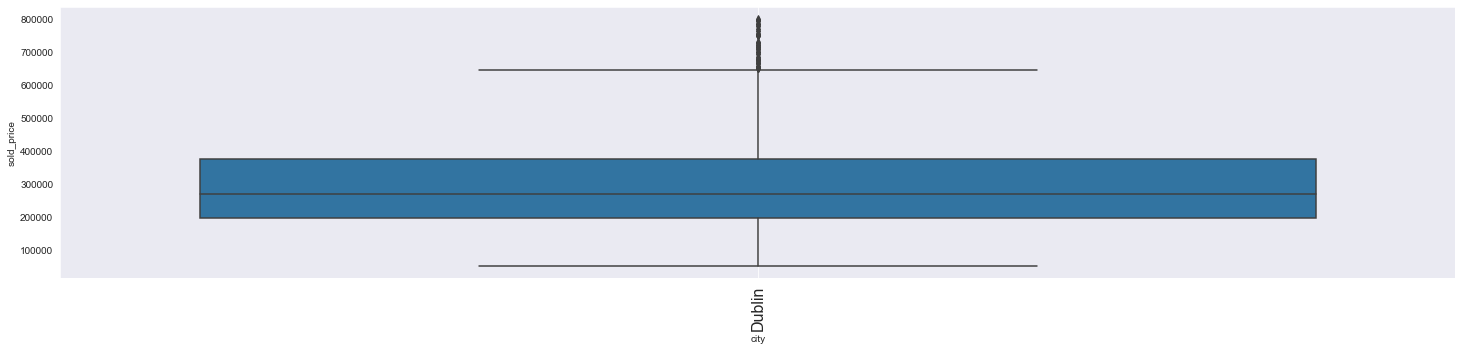

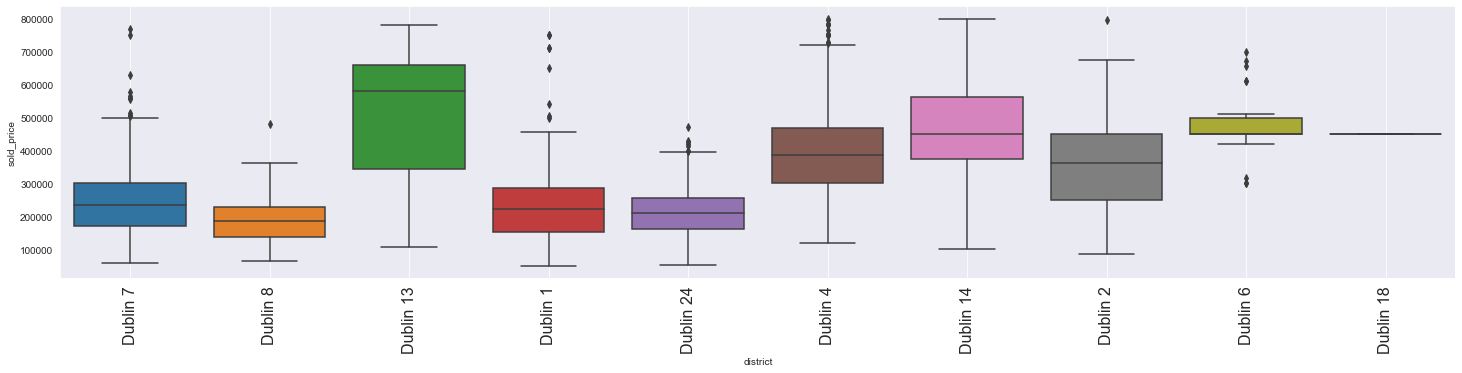

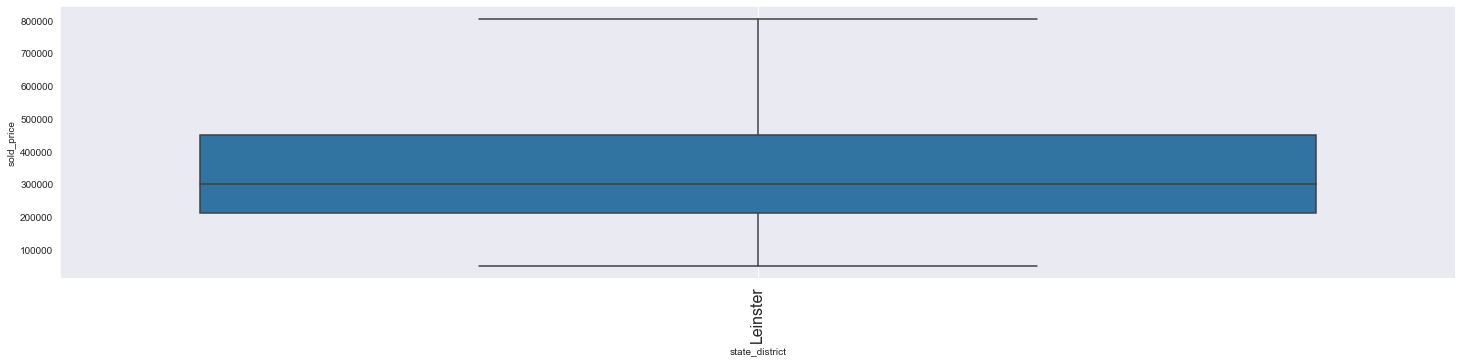

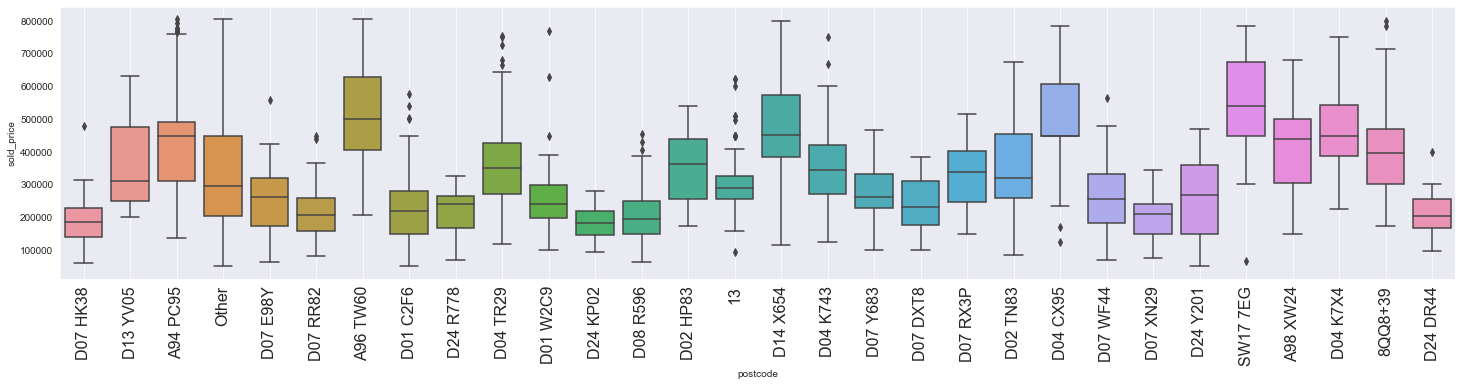

In [21]:
categorical_features = ['thoroughfare_id', 'census2016_small_area_geogid',
                'eircode_area_code','post_county_name', 
                'building_property_subtype_code', 
                'road', 'city_district', 'city', 'district', 
                'state_district', 'postcode']



for col in categorical_features:
    quant = QuantizeCat(features = col, treshold = 0.8)
    dfTemp =  df[[col, 'sold_price']]
    dfTemp['sold_price'] = remove_outliers_iqr_label(dfTemp['sold_price'])
    if col not in ['district', 'city_district', 'post_county_name', 'state_district','city',
                   
                  ]:
        quant.fit(dfTemp)
        dfTemp[col] = quant.transform(dfTemp)
    
    fig, axes = plt.subplots(figsize=(25,5))
    plt.xticks(rotation=90, fontsize=16)
    sns.boxplot(x=col, y='sold_price', data=dfTemp);
    axes.grid()

In [23]:
date_process = DateProcess('sold_date')
date_process.fit(df)
date_process.transform(df)

,sold_date_day,sold_date_month,sold_date_year,sold_date_quarter,sold_date_dayofweek,sold_date_dayofyear
0,24,8,2015,3,0,236
1,20,11,2018,4,1,324
2,21,6,2016,2,1,173
3,20,7,2018,3,4,201
4,20,6,2018,2,2,171
...,...,...,...,...,...,...
2495,10,11,2016,4,3,315
2496,10,12,2018,4,0,344
2497,21,12,2016,4,2,356
2498,6,8,2017,3,6,218


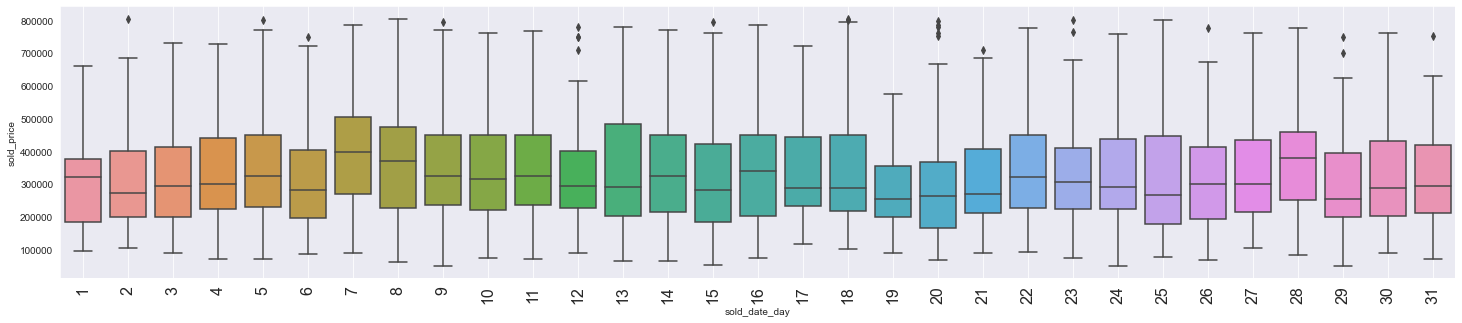

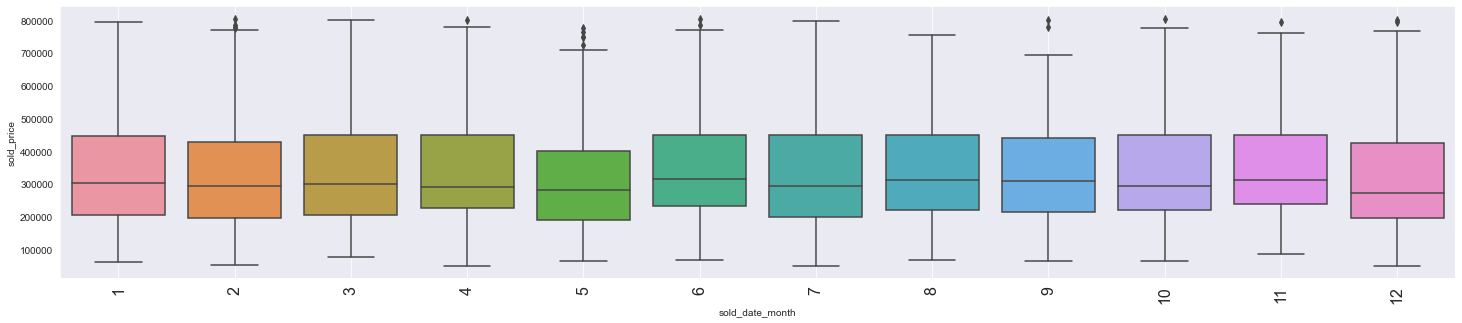

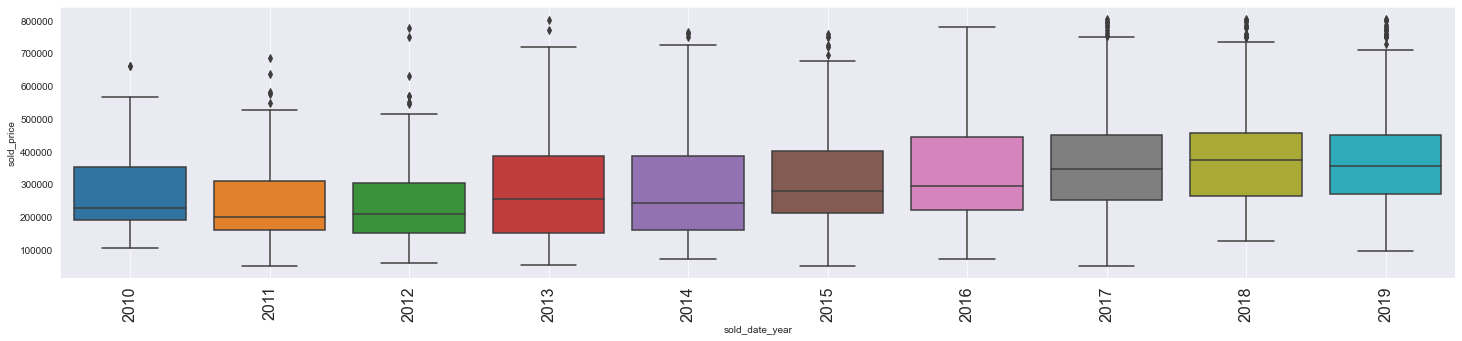

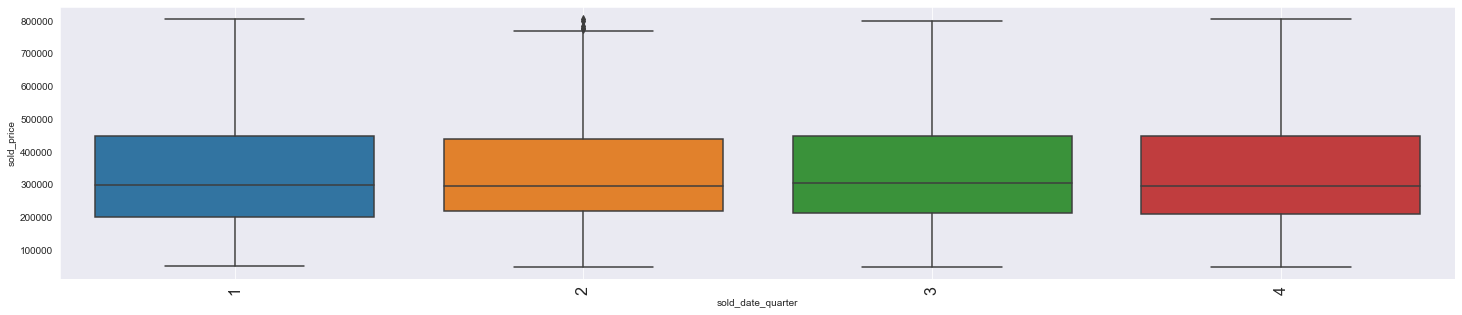

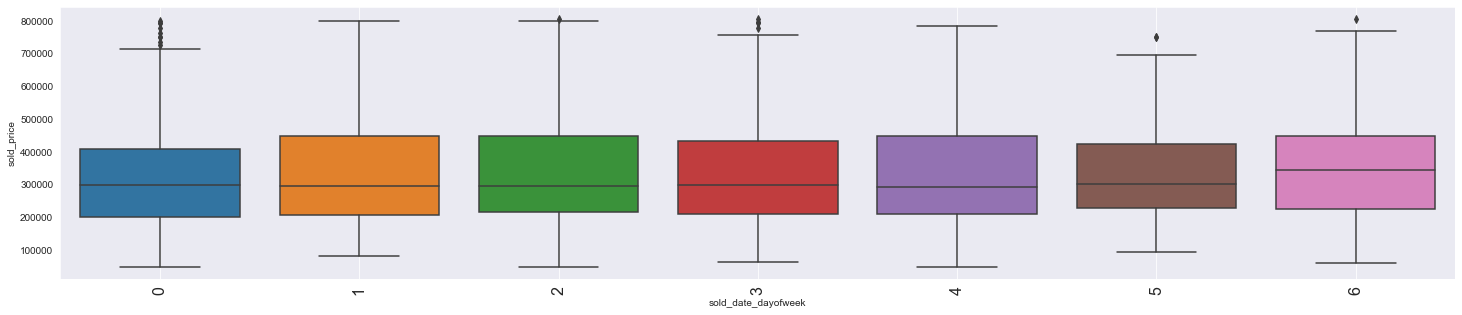

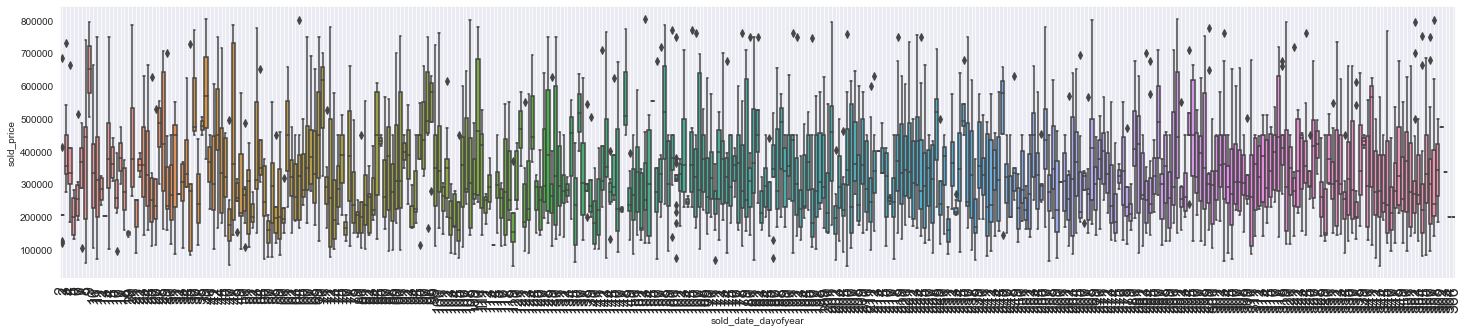

In [32]:
temporal_features = ['sold_date_day','sold_date_month', 'sold_date_year', 'sold_date_quarter',
                        'sold_date_dayofweek', 'sold_date_dayofyear']

d = date_process.transform(df)
d['sold_price'] = remove_outliers_iqr_label(df['sold_price'])

for col in temporal_features:
    dfTemp =  d[[col, 'sold_price']]
    
    
    fig, axes = plt.subplots(figsize=(25,5))
    plt.xticks(rotation=90, fontsize=16)
    sns.boxplot(x=col, y='sold_price', data=dfTemp);
    axes.grid()